## **<font color = 'blue'>Sleep Efficiency Analysis</font>**

**Nguồn**: [Abdullah, Y. (2025). Smartwatch Sleep Tracking Dataset (Synthetic, 2018–2025). Synthetic Dataset for AI Research and Education.](https://www.kaggle.com/datasets/mirzayasirabdullah07/smartwatch-sleep-tracking-dataset-20182025)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("data/Sleep_dataset.csv")

print("Shape:", df.shape)
df.head()


Shape: (20000, 45)


,user_id,date_recorded,sleep_start_timestamp,sleep_end_timestamp,duration_minutes,sleep_latency_minutes,wake_after_sleep_onset_minutes,sleep_efficiency_pct,sleep_score,daily_label,sleep_stage_deep_pct,sleep_stage_light_pct,sleep_stage_rem_pct,sleep_stage_awake_pct,heart_rate_mean_bpm,heart_rate_min_bpm,heart_rate_max_bpm,hrv_rmssd_ms,respiration_rate_bpm,spo2_mean_pct,spo2_min_pct,movement_count,snore_events,ambient_noise_db,room_temperature_c,room_humidity_pct,step_count_day,caffeine_mg,alcohol_units,medication_flag,jetlag_hours,timezone,age,gender,weight_kg,height_cm,device_model,bedtime_consistency_std_min,stress_score,activity_before_bed_min,screen_time_before_bed_min,insomnia_flag,apnea_risk_score,nap_duration_minutes,created_at
0,user_00332,2024-04-03,2024-04-03 22:36:00,2024-04-04 06:01:00,445,2,15,96.2,59,fair,15.6,53.3,15.8,15.3,62.3,54.3,71.3,31.1,14.4,96.7,94.5,29,0,38.9,23.7,57.5,5139,126,0.2,0,-11,Europe/London,50,female,94.2,166.1,AlphaWatch X1,37.1,33,39,87,0,24,10,2025-10-21 16:41:53.708868
1,user_00677,2018-12-05,2018-12-05 23:41:00,2018-12-06 04:36:00,295,18,1,93.6,61,fair,20.6,52.0,16.5,11.0,60.6,51.4,74.6,36.9,15.5,96.1,96.1,25,1,30.6,22.3,48.4,4231,92,2.6,0,8,UTC,40,male,87.3,172.4,AlphaWatch X1,9.6,20,1,0,0,15,9,2025-10-21 16:41:53.709912
2,user_01815,2025-03-30,2025-03-30 23:41:00,2025-03-31 06:56:00,435,6,50,87.1,58,fair,20.0,49.3,22.3,8.4,65.4,61.1,72.9,23.2,13.3,96.8,95.2,34,3,21.5,25.4,28.4,2358,150,1.6,0,8,Europe/London,26,female,93.3,158.0,PulsePro 3,35.5,29,5,37,0,33,0,2025-10-21 16:41:53.711057
3,user_00488,2023-05-11,2023-05-11 22:24:00,2023-05-12 06:10:00,466,10,12,95.3,53,fair,13.3,52.9,17.1,16.6,57.3,55.3,70.6,5.0,13.0,99.2,97.8,32,1,34.5,23.0,46.7,13506,83,1.4,1,4,UTC+2,66,male,53.8,152.6,WristFit Z,65.4,41,69,71,0,8,3,2025-10-21 16:41:53.712147
4,user_00498,2019-12-11,2019-12-11 22:17:00,2019-12-12 04:29:00,372,1,2,99.2,60,fair,22.0,50.7,21.1,6.3,50.1,47.0,54.8,39.6,13.8,99.0,98.1,24,0,31.1,21.8,42.2,2174,29,0.0,0,-5,Asia/Tokyo,72,male,78.4,155.1,WristFit Z,0.4,54,49,31,0,26,5,2025-10-21 16:41:53.713204


In [2]:
# Thông tin tổng quan
df.info()

# Kiểm tra missing values
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         20000 non-null  object 
 1   date_recorded                   20000 non-null  object 
 2   sleep_start_timestamp           20000 non-null  object 
 3   sleep_end_timestamp             20000 non-null  object 
 4   duration_minutes                20000 non-null  int64  
 5   sleep_latency_minutes           20000 non-null  int64  
 6   wake_after_sleep_onset_minutes  20000 non-null  int64  
 7   sleep_efficiency_pct            20000 non-null  float64
 8   sleep_score                     20000 non-null  int64  
 9   daily_label                     20000 non-null  object 
 10  sleep_stage_deep_pct            20000 non-null  float64
 11  sleep_stage_light_pct           20000 non-null  float64
 12  sleep_stage_rem_pct             

user_id                           0
date_recorded                     0
sleep_start_timestamp             0
sleep_end_timestamp               0
duration_minutes                  0
sleep_latency_minutes             0
wake_after_sleep_onset_minutes    0
sleep_efficiency_pct              0
sleep_score                       0
daily_label                       0
sleep_stage_deep_pct              0
sleep_stage_light_pct             0
sleep_stage_rem_pct               0
sleep_stage_awake_pct             0
heart_rate_mean_bpm               0
heart_rate_min_bpm                0
heart_rate_max_bpm                0
hrv_rmssd_ms                      0
respiration_rate_bpm              0
spo2_mean_pct                     0
spo2_min_pct                      0
movement_count                    0
snore_events                      0
ambient_noise_db                  0
room_temperature_c                0
room_humidity_pct                 0
step_count_day                    0
caffeine_mg                 

In [3]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Numeric columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))

Numeric columns: 36
Categorical columns: 9


In [4]:
cols_to_drop = [
    'user_id', 
    'date_recorded', 
    'sleep_start_timestamp', 
    'sleep_end_timestamp', 
    'created_at', 
    'timezone', 
    'device_model', 
    'daily_label'
]

df_clean = df.drop(columns=cols_to_drop)

df_clean = df_clean.dropna()

if 'gender' in df_clean.columns:
    df_clean['gender'] = df_clean['gender'].map({'male': 0, 'female': 1})

print(f"Kích thước dữ liệu sau khi làm sạch: {df_clean.shape}")

Kích thước dữ liệu sau khi làm sạch: (20000, 37)


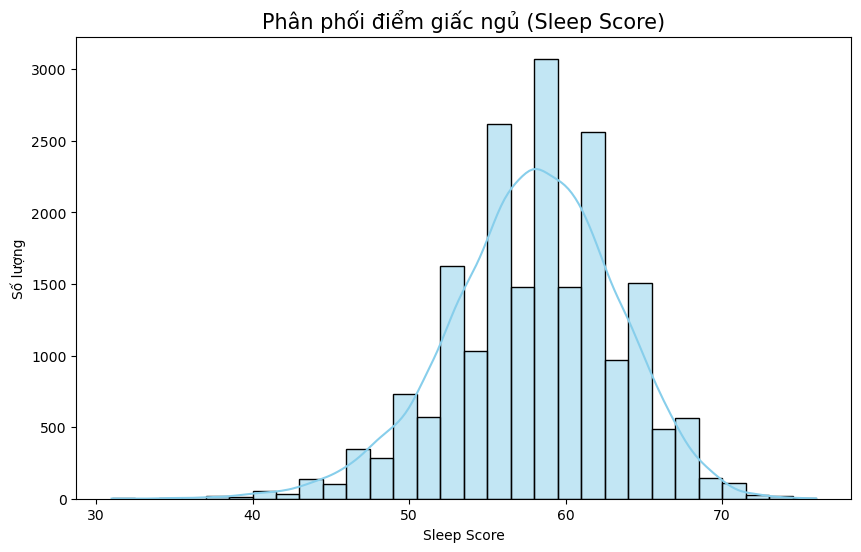

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['sleep_score'], kde=True, bins=30, color='skyblue')
plt.title('Phân phối điểm giấc ngủ (Sleep Score)', fontsize=15)
plt.xlabel('Sleep Score')
plt.ylabel('Số lượng')
plt.show()


=== Correlation matrix – SleepQuality data ===
sleep_score                       1.000000
sleep_efficiency_pct              0.601833
sleep_stage_deep_pct              0.233924
sleep_stage_rem_pct               0.178063
duration_minutes                  0.139026
spo2_mean_pct                     0.014700
spo2_min_pct                      0.008284
bedtime_consistency_std_min       0.007682
nap_duration_minutes              0.005105
respiration_rate_bpm              0.004771
apnea_risk_score                  0.004186
hrv_rmssd_ms                      0.003783
caffeine_mg                       0.003293
screen_time_before_bed_min        0.002838
activity_before_bed_min           0.002250
jetlag_hours                      0.000724
age                               0.000313
medication_flag                  -0.000455
weight_kg                        -0.000592
ambient_noise_db                 -0.000706
room_humidity_pct                -0.000849
step_count_day                   -0.002662
moveme

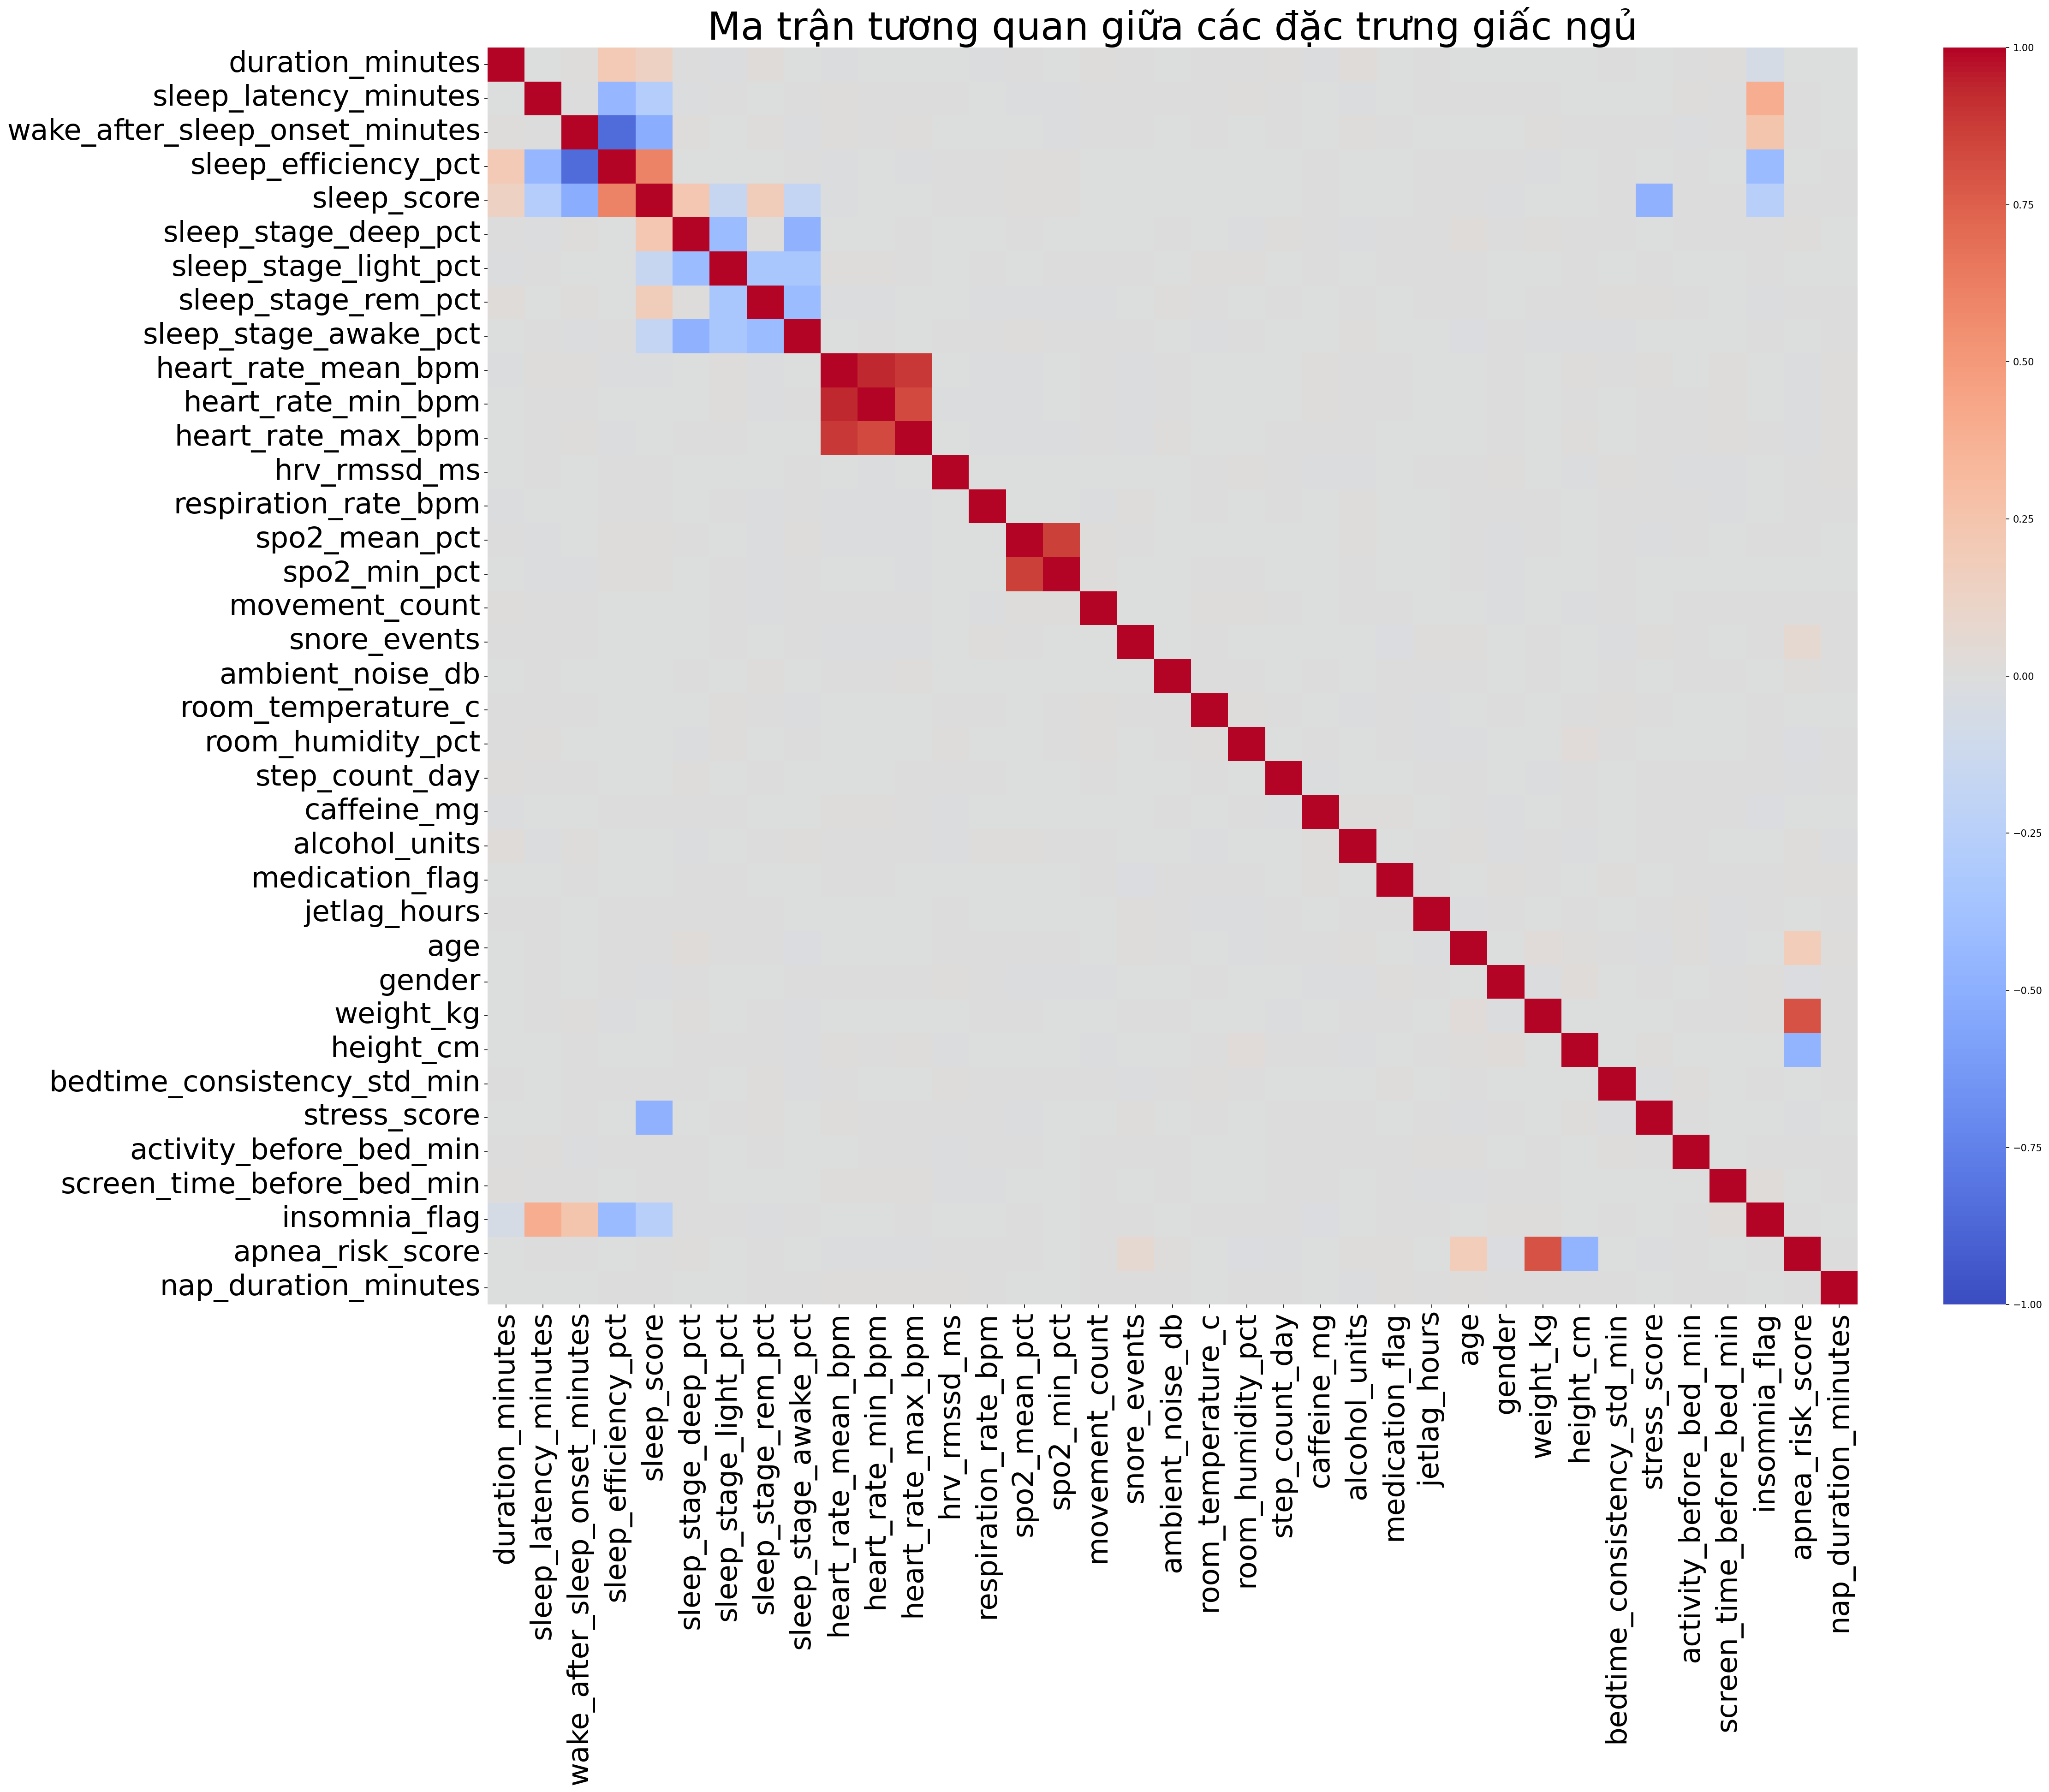

In [6]:
corr_matrix = df_clean.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(32, 26), dpi=150)

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=False,
    ax=ax
)


print("\n=== Correlation matrix – SleepQuality data ===")
print(corr_matrix["sleep_score"].sort_values(ascending=False))

ax.set_xticks(np.arange(len(corr_matrix.columns)) + 0.5)
ax.set_yticks(np.arange(len(corr_matrix.index)) + 0.5)

ax.set_xticklabels(
    corr_matrix.columns,
    rotation=90,
    fontsize=30
)
ax.set_yticklabels(
    corr_matrix.index,
    fontsize=30
)

plt.title('Ma trận tương quan giữa các đặc trưng giấc ngủ', fontsize=40)
plt.tight_layout()
plt.show()

In [7]:
correlations = df_clean.corr()['sleep_score']
cols_to_drop_weak = correlations[correlations.abs() < 0.1].index.tolist()
df_sleep = df_clean.drop(columns=cols_to_drop_weak)

In [8]:
pct_cols = [col for col in df_sleep.columns if 'pct' in col]

for col in pct_cols:
    new_col_name = col.replace('_pct', '')
    df_sleep[new_col_name] = (df_sleep[col] / 100.0) * df_sleep['duration_minutes']
    df_sleep[new_col_name]=df_sleep[new_col_name].round().astype(int)
df_sleep=df_sleep.drop(columns=pct_cols)

In [9]:
corr_matrix_new = df_sleep.corr()
print("\n=== Correlation matrix – SleepQuality data ===")
print(corr_matrix_new["sleep_score"].sort_values(ascending=False))
df_sleep.head()


=== Correlation matrix – SleepQuality data ===
sleep_score                       1.000000
sleep_efficiency                  0.303495
sleep_stage_deep                  0.267927
sleep_stage_rem                   0.221314
duration_minutes                  0.139026
sleep_stage_light                 0.012868
sleep_stage_awake                -0.139205
insomnia_flag                    -0.256583
sleep_latency_minutes            -0.272352
stress_score                     -0.488698
wake_after_sleep_onset_minutes   -0.508342
Name: sleep_score, dtype: float64


,duration_minutes,sleep_latency_minutes,wake_after_sleep_onset_minutes,sleep_score,stress_score,insomnia_flag,sleep_efficiency,sleep_stage_deep,sleep_stage_light,sleep_stage_rem,sleep_stage_awake
0,445,2,15,59,33,0,428,69,237,70,68
1,295,18,1,61,20,0,276,61,153,49,32
2,435,6,50,58,29,0,379,87,214,97,37
3,466,10,12,53,41,0,444,62,247,80,77
4,372,1,2,60,54,0,369,82,189,78,23


**<font color='red'>Nhận xét</font>**: 2 dữ liệu insomnia_flag và stress_score không thể tính toán bằng thiết bị. 
- Trong ma trận tương quan thì insomnia_flag có tương quan tốt với sleep_latency_minutes nên ta có thể bỏ qua. 
- Bỏ stress_score nốt do không tìm được công cụ tính toán khách quan và không có mối quan hệ trong bài

In [10]:
df_sleep = df_sleep.drop(columns=["stress_score","insomnia_flag", "duration_minutes"])
print(df_sleep.columns)

Index(['sleep_latency_minutes', 'wake_after_sleep_onset_minutes',
       'sleep_score', 'sleep_efficiency', 'sleep_stage_deep',
       'sleep_stage_light', 'sleep_stage_rem', 'sleep_stage_awake'],
      dtype='object')


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_sleep.drop(columns=["sleep_score"])
y = df_sleep["sleep_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

#chuẩn hoá + Elastic Net Regression (mô hình tuyến tính có regularization)
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("enet", ElasticNet(max_iter=40000, random_state=42))
])

param_grid = {
    "enet__alpha": [0.001, 0.01, 0.1, 1, 10],
    "enet__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

In [12]:
print(X.columns)

Index(['sleep_latency_minutes', 'wake_after_sleep_onset_minutes',
       'sleep_efficiency', 'sleep_stage_deep', 'sleep_stage_light',
       'sleep_stage_rem', 'sleep_stage_awake'],
      dtype='object')


In [13]:
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best CV R^2:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Test MAE :", mae)
print("Test RMSE:", rmse)
print("Test R^2 :", r2)

Best params: {'enet__alpha': 0.01, 'enet__l1_ratio': 0.9}
Best CV R^2: 0.44888618530625096
Test MAE : 3.165068957145717
Test RMSE: 3.9435527008268765
Test R^2 : 0.4414152841855604


**<font color="red">NHẬN XÉT:</font>** Mô hình chỉ lệch 3.94 điểm so với thực tế

## **Deploy model**

In [14]:
import joblib
joblib.dump(grid, "sleep_score_model.joblib")


['sleep_score_model.joblib']